# Fraud Detection

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Fraud.csv')

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [20]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [84]:
df.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

#The provided data has the financial transaction data as well as the target variable isFraud, which is the actual fraud status of the transaction and isFlaggedFraud is the indicator which the simulation is used to flag the transaction using some threshold value.

In [12]:
df.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

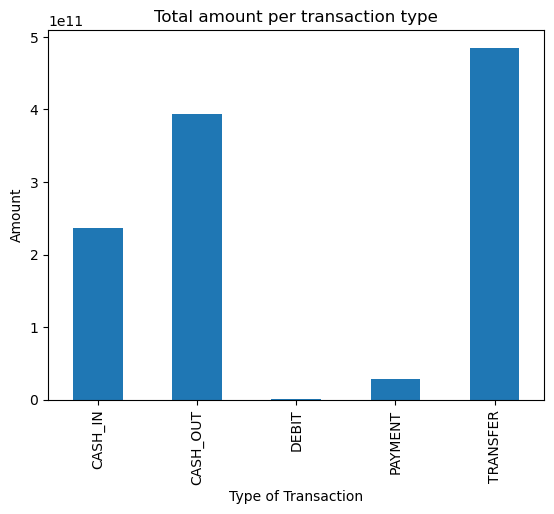

In [15]:
var = df.groupby('type').amount.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
var.plot(kind='bar')
ax1.set_title("Total amount per transaction type")
ax1.set_xlabel('Type of Transaction')
ax1.set_ylabel('Amount');

Text(0.5, 1.0, 'Count of isFraud using Transtion')

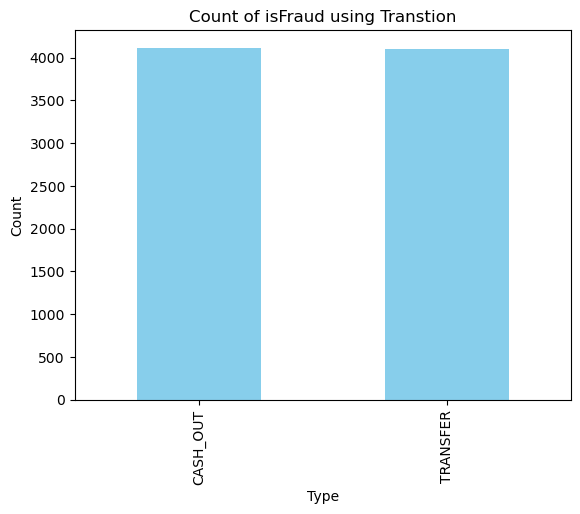

In [18]:
Fraud = df[df['isFraud'] == 1]
groupFraud = Fraud['type'].value_counts()
ax = groupFraud.plot(kind='bar',color ='skyblue')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title("Count of Fraud using Transtion")

Text(0.5, 1.0, 'Count of isFraud using Transtion')

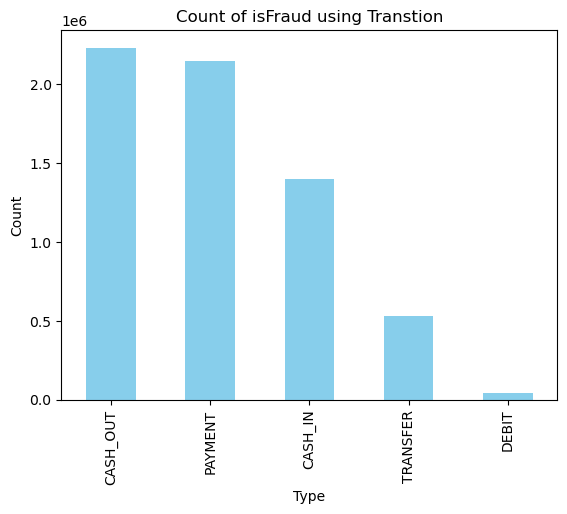

In [19]:
Fraud = df[df['isFraud'] == 0]
groupFraud = Fraud['type'].value_counts()
ax = groupFraud.plot(kind='bar',color ='skyblue')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title("Count of Non-Fraud Transtion")

The graph above shows that TRANSFER and CASH_OUT are two most used mode of transaction and we can see that TRANSFER and CASH_OUT are also the only way in which fraud happen. Thus we will focus on this type of transactions.

C:\Users\abc\AppData\Local\Temp\ipykernel_4452\3935509867.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='RdBu')


<Axes: >

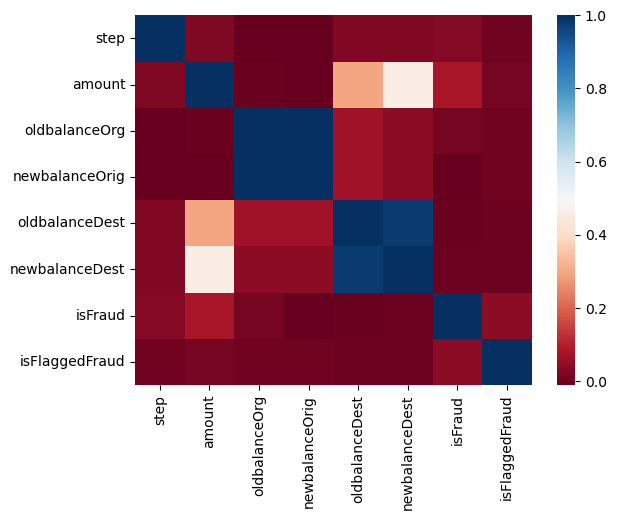

In [35]:
sns.heatmap(df.corr(),cmap='RdBu')

1. OldbalanceOrg and NewbalanceOrg are highly correlated.
2. OldbalanceDest and NewbalanceDest are highly correlated.
3. Amount is correlated with isFraud(Target Variable).

# Model Building

In [36]:
df1 = df.copy()

In [37]:
df1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [38]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()
df1['type']=le.fit_transform(df1['type'])

In [43]:
df1.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [44]:
df1.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


In [53]:
x = df1.drop(['isFraud'],axis=1)
y = df1['isFraud']

In [54]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

In [65]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [56]:
train_y.shape

(4453834,)

In [68]:
lg = LogisticRegression()
lg.fit(train_x,train_y)
y_pred_lg = lg.predict(test_x)
accuracy_lg =round(accuracy_score(test_y,y_pred_lg),4)
print("Accuracy og Model: ",accuracy_lg)
print("-------------------------------------------")
print("Classification report: \n",classification_report(test_y,y_pred_lg))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(test_y,y_pred_lg))

Accuracy og Model:  0.9982
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906267
           1       0.36      0.43      0.39      2519

    accuracy                           1.00   1908786
   macro avg       0.68      0.71      0.69   1908786
weighted avg       1.00      1.00      1.00   1908786

-------------------------------------------
confusion matrix: 
 [[1904319    1948]
 [   1439    1080]]


In [66]:
xg = XGBClassifier()
xg.fit(train_x,train_y)
y_pred_xg = xg.predict(test_x)
accuracy_xg =round(accuracy_score(test_y,y_pred_xg),4)
print("Accuracy of Model: ",accuracy_xg)
print("-------------------------------------------")
print("Classification report: \n",classification_report(test_y,y_pred_xg))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(test_y,y_pred_xg))

Accuracy of Model:  0.9998
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906267
           1       0.98      0.87      0.92      2519

    accuracy                           1.00   1908786
   macro avg       0.99      0.94      0.96   1908786
weighted avg       1.00      1.00      1.00   1908786

-------------------------------------------
confusion matrix: 
 [[1906219      48]
 [    326    2193]]


In [67]:
ab = AdaBoostClassifier()
ab.fit(train_x,train_y)
y_pred_ab = ab.predict(test_x)
accuracy_ab =round(accuracy_score(test_y,y_pred_ab),4)
print("Accuracy of Model: ",accuracy_ab)
print("-------------------------------------------")
print("Classification report: \n",classification_report(test_y,y_pred_ab))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(test_y,y_pred_ab))

Accuracy of Model:  0.9993
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906267
           1       0.93      0.52      0.67      2519

    accuracy                           1.00   1908786
   macro avg       0.96      0.76      0.84   1908786
weighted avg       1.00      1.00      1.00   1908786

-------------------------------------------
confusion matrix: 
 [[1906168      99]
 [   1197    1322]]


# Conclusion
1. LogisticRegression perform well but due to Imbalance class the model not predict fraud class
2. XGBClassifier give me good response

# Balancing

In [69]:
fraud_t = df1[df['isFraud']==1]
fraud_f = df1[df['isFraud']==0]

In [71]:
fraud_t.shape,fraud_f.shape

((8213, 8), (6354407, 8))

In [72]:
fraud_f = fraud_f.sample(3000000,replace=True)
fraud_f.shape

(3000000, 8)

In [73]:
fraud_t = fraud_t.sample(3000000,replace=True)
fraud_t.shape

(3000000, 8)

In [74]:
df_balanced = pd.concat([fraud_f,fraud_t],axis=0)
df_balanced.shape

(6000000, 8)

In [75]:
x_bal = df_balanced.drop(columns = 'isFraud')
y_bal = df_balanced['isFraud']

In [76]:
x_train , x_test ,y_train , y_test = train_test_split(x_bal,y_bal,train_size=0.7,random_state=2)

In [77]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred_lg = lg.predict(x_test)
accuracy_lg =round(accuracy_score(y_test,y_pred_lg),4)
print("Accuracy og Model: ",accuracy_lg)
print("-------------------------------------------")
print("Classification report: \n",classification_report(y_test,y_pred_lg))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(y_test,y_pred_lg))

Accuracy og Model:  0.9044
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91    899855
           1       0.91      0.90      0.90    900145

    accuracy                           0.90   1800000
   macro avg       0.90      0.90      0.90   1800000
weighted avg       0.90      0.90      0.90   1800000

-------------------------------------------
confusion matrix: 
 [[820024  79831]
 [ 92236 807909]]


In [78]:
xg = XGBClassifier()
xg.fit(x_train,y_train)
y_pred_xg = xg.predict(x_test)
accuracy_xg =round(accuracy_score(y_test,y_pred_xg),4)
print("Accuracy of Model: ",accuracy_xg)
print("-------------------------------------------")
print("Classification report: \n",classification_report(y_test,y_pred_xg))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(y_test,y_pred_xg))

Accuracy of Model:  0.9994
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    899855
           1       1.00      1.00      1.00    900145

    accuracy                           1.00   1800000
   macro avg       1.00      1.00      1.00   1800000
weighted avg       1.00      1.00      1.00   1800000

-------------------------------------------
confusion matrix: 
 [[898732   1123]
 [     0 900145]]


In [79]:
ab = AdaBoostClassifier()
ab.fit(x_train,y_train)
y_pred_ab = ab.predict(x_test)
accuracy_ab =round(accuracy_score(y_test,y_pred_ab),4)
print("Accuracy of Model: ",accuracy_ab)
print("-------------------------------------------")
print("Classification report: \n",classification_report(y_test,y_pred_ab))
print("-------------------------------------------")
print("confusion matrix: \n",confusion_matrix(y_test,y_pred_ab))

Accuracy of Model:  0.9756
-------------------------------------------
Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98    899855
           1       0.97      0.98      0.98    900145

    accuracy                           0.98   1800000
   macro avg       0.98      0.98      0.98   1800000
weighted avg       0.98      0.98      0.98   1800000

-------------------------------------------
confusion matrix: 
 [[872048  27807]
 [ 16178 883967]]


# Conclusion
1. After Balacing Data Precision and recall value perform well of both class

# Question
1. Describe your fraud detection model in elaboration. 
2. How did you select variables to be included in the model?
3. Demonstrate the performance of the model by using best set of tools. 
4. What are the key factors that predict fraudulent customer? 
5. Do these factors make sense? If yes, How? If not, How not? 
6. What kind of prevention should be adopted while company update its infrastructure?
7. Assuming these actions have been implemented, how would you determine if they work

Describe your fraud detection model in elaboration.
- In the initial phase of the project, I begin by uploading the dataset to the notebook, followed by the conversion of the dataset into a structured DataFrame for ease of analysis and manipulation. The subsequent step involves embarking on an Exploratory Data Analysis (EDA) journey. Here, I meticulously examine the dataset for null and missing values, ensuring data integrity. Additionally, a thorough correlation analysis is conducted to unveil relationships between different features, providing insights into the interdependencies within the dataset. Visualizations are then employed to enhance the understanding of the data distribution, uncover trends, and identify patterns.

- Moving forward, the project transitions into the model-building phase, where three classification models are implemented. The first model, Logistic Regression, is employed for its simplicity and effectiveness in binary classification tasks. Subsequently, the more sophisticated XGBoost algorithm is introduced, known for its robust performance and ability to handle complex datasets. Finally, the AdaBoost algorithm is integrated into the model-building process, boosting the performance of weak learners and contributing to the overall predictive accuracy. This comprehensive approach, from data preprocessing to model building, aims to leverage diverse techniques to gain meaningful insights from the dataset and achieve accurate classification results

How did you select variables to be included in the model?
- In this Project we use heat map which identify importence of variables. 

What kind of prevention should be adopted while company update its infrastructure?
- keep model upto-date 
- old model not predict the actual fraud
- collect balance Data so Model predict Accurtely

What are the key factors that predict fraudulent customer?
- most of fraud transaction mode are CASH-OUT and TRANSFER
- most of fraud after transaction will be null